# Time Series Forecasting

### Content:
- Defining Parameters
- Splitting the Data
- Running and Fitting the Model

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

#disable deprecation warnings
warnings.filterwarnings('ignore')

#styling option for plots
plt.style.use('fivethirtyeight')

Prerequisite to forecasting are having stationary data and an appropriate model. In the other script, we made our data stationary. In this script, we'll set up our model and forecast our data.

In [3]:
#import differenced data
data_diff = pd.read_pickle('/Users/kimballwightman/Desktop/Projects/Oil Prices Time Series Analysis:Forecast/01 Data/data_diff.pkl')

In [4]:
data_diff.head()

,Price in Contemporary Dollars,Price in 2021 Dollars
datetime,,
1991-12-31,-3.724906,-8.975373
1992-12-31,-0.680078,-2.365199
1993-12-31,-2.349202,-5.243543
1994-12-31,-1.154008,-2.774230
1995-12-31,1.199053,1.275002


In [8]:
data_diff.shape

(31, 2)

### Defining Parameters

The different kinds of paramaters for an ARIMA model:
- p: the number of lag observations included in the model, called the lag order (AR)
- q: the size of the moving average window, called the order of MA
- d: the number of times the data was differenced to reach stationarity

We're using an ARIMA model because we differenced our data. If it was already stationary and didn't need differencing, we would use an ARMA model, with only parameters p and q.

<Figure size 4500x1500 with 0 Axes>

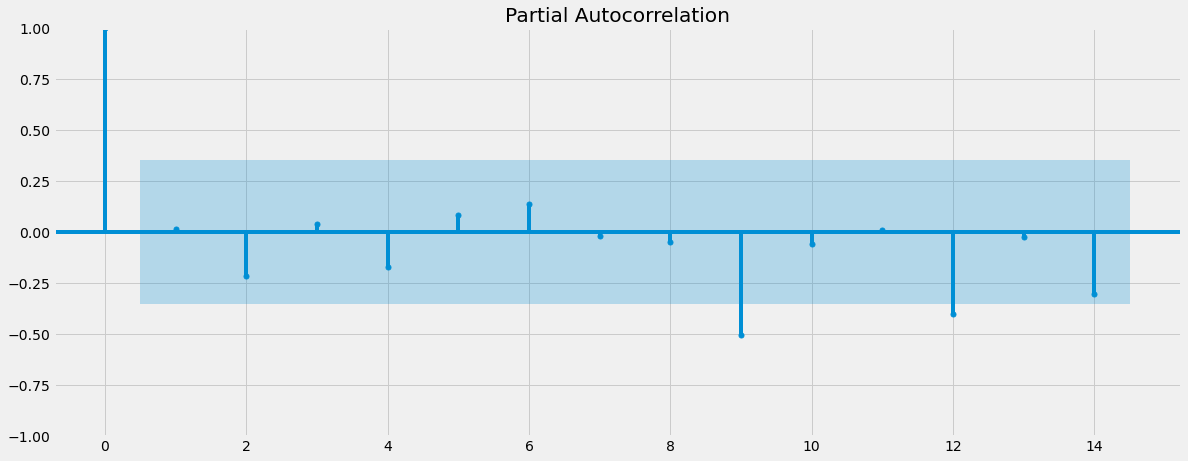

In [23]:
#plot partial autocorrelations to determine parameter p
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

plt.figure(figsize=(15,5), dpi=300)
plot_pacf(data_diff['Price in 2021 Dollars'], lags=14)
plt.show()

Because the first lag is most significant, we'll consider p to be 1.

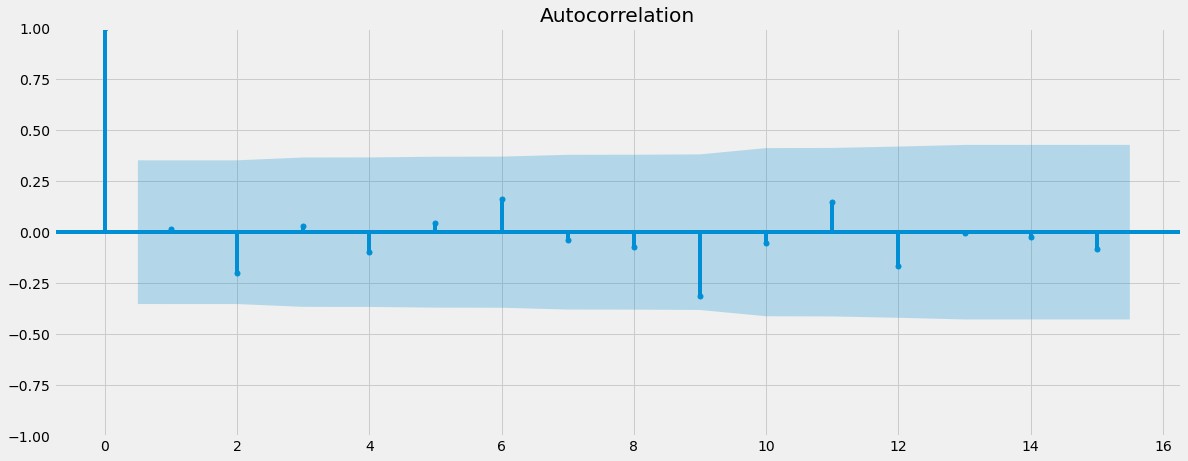

In [24]:
#plot the autocorrelations to determine paramter q
plot_acf(data_diff['Price in 2021 Dollars'])
plt.show()

Similar to the partial correlation plot. We'll set q as 1.

Because we differenced once, d will be 1 as well.

It's good to be conservative with parameters as well. If the output isn't satisfactory, then we can iterate the process until we get what we're looking for.

### Splitting the Data

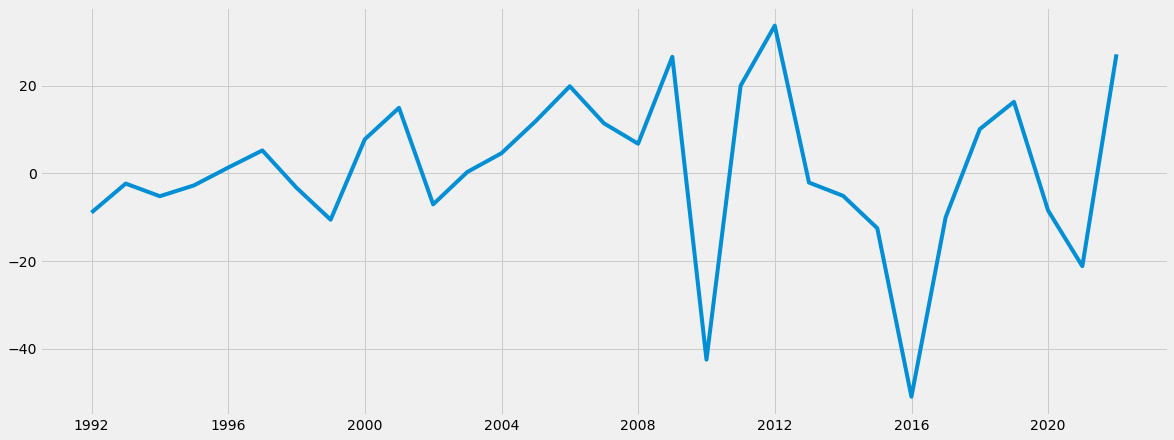

In [27]:
#figure out where to split the data
plt.plot(data_diff['Price in 2021 Dollars'])

In [32]:
data_diff

,Price in Contemporary Dollars,Price in 2021 Dollars
datetime,,
1991-12-31,-3.724906,-8.975373
1992-12-31,-0.680078,-2.365199
1993-12-31,-2.349202,-5.243543
1994-12-31,-1.154008,-2.774230
1995-12-31,1.199053,1.275002
1996-12-31,3.651809,5.194938
1997-12-31,-1.575901,-3.305895
1998-12-31,-6.376926,-10.597466
1999-12-31,5.254416,7.726393


In [36]:
#split the data
train = data_diff['Price in 2021 Dollars'][:23]
test = data_diff['Price in 2021 Dollars'][22:]

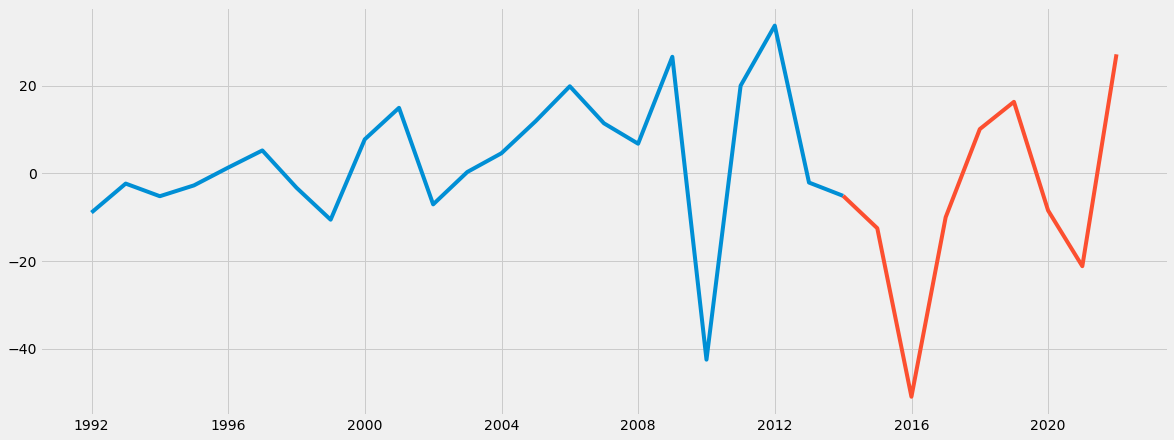

In [37]:
plt.plot(train)
plt.plot(test)

In [40]:
test.shape

(9,)

### Running and Fitting the Model

In [41]:
#import the model
from statsmodels.tsa.api import ARIMA

In [53]:
#train the model
model = ARIMA(train, order=(1,1,1))
fitted = model.fit()
print(fitted.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Price in 2021 Dollars   No. Observations:                   23
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 -92.561
Date:                   Wed, 10 Aug 2022   AIC                            191.122
Time:                           18:17:39   BIC                            194.395
Sample:                       12-31-1991   HQIC                           191.893
                            - 12-31-2013                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1737      0.310     -0.559      0.576      -0.782       0.435
ma.L1         -0.8960      0.184     -4.869      0.000      -1.257      -0.535
sigma2       241.9601     75

In [61]:
#forecast
fc = fitted.forecast(9, alpha=0.05)
conf = fitted.get_forecast(9, alpha=0.05).conf_int()

In [62]:
# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

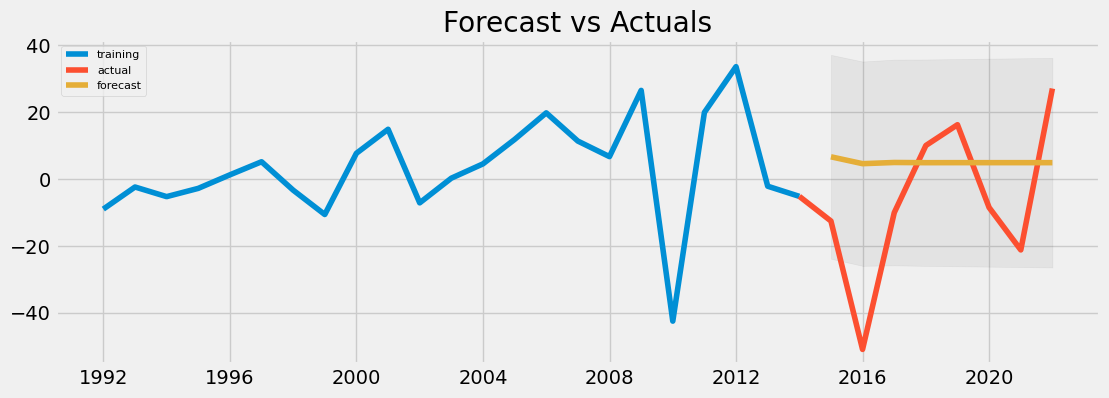

In [63]:
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This is a pretty ugly forecast. Typically what would happen here is we woud iterate running the model using different parameters, usually decreasing the numbers. Since we're already at 1 for all 3, we can't really go much lower.

Limitation: the data we used is on a yearly basis, with very few observations. That's part of what contributed to our poor forecast. Next time, get better data with more observations to get a more accurate forecast.

Once all the coefficients of the variables included in the model are significant (p-value is less than 0.05), then we'd have a good model.